Import libraries and read in data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/combined_tabular_data.csv")

pd.set_option('display.max_columns', 500)
print(df.shape)

<ipython-input-1-b40dc0b6c10c>:4: DtypeWarning: Columns (289,290,291) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/combined_tabular_data.csv")


(28893, 293)


Create new column called day_month_year to get the timestamp of when the image was uploaded

In [2]:
df['date_uploaded'] = pd.to_datetime(df['date_uploaded'])
df['day_month_year'] = pd.to_datetime(df['date_uploaded'].dt.strftime('%m-%d-%Y'))

print("The earliest upload date is: ", min(df['day_month_year']))
print("The latest upload date is: ",max(df['day_month_year']))

The earliest upload date is:  2017-04-23 00:00:00
The latest upload date is:  2024-05-13 00:00:00


Create a histogram of when the images were uploaded

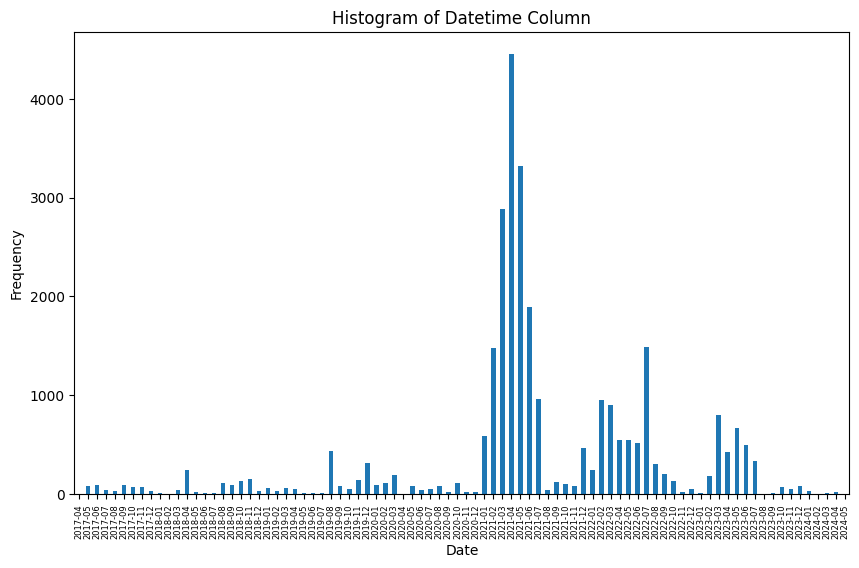

In [3]:
plt.figure(figsize=(10, 6))
value_counts = df['day_month_year'].dt.to_period('M').value_counts().sort_index()
value_counts.plot(kind='bar')
plt.xlabel('Date')
plt.xticks(size = 6)
plt.ylabel('Frequency')
plt.title('Histogram of Datetime Column')
plt.show()

In [4]:
null_values = (df.isna().sum()/df.shape[0]).sort_values(ascending = False).to_frame().reset_index()
null_values = null_values.rename(columns = {"index":"col_name", 0: "perc_null"})
num_cols_null = null_values[null_values['perc_null']>=0.95].shape[0]
print(f"{num_cols_null} of the columns have more than 95 percent null values")

271 of the columns have more than 95 percent null values


Create histogram of the "total_litter" column

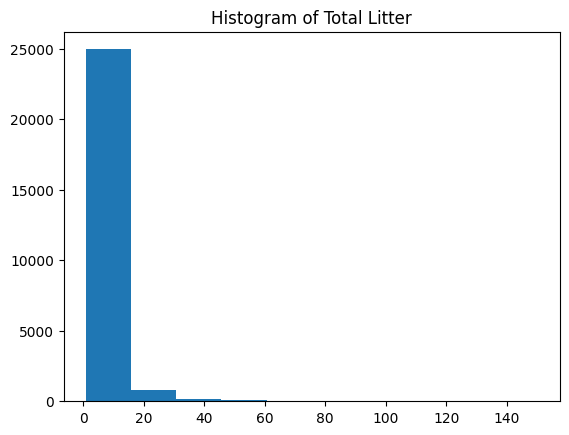

In [5]:
plt.hist(df['total_litter'])
plt.title("Histogram of Total Litter")
plt.show()

In [6]:
litter_columns = (set(df.columns)-set(['id', 'verification', 'phone', 'date_taken', 'date_uploaded', 'lat', 'lon', 'picked up', 'address', 'total_litter', 'day_month_year']))

litter_df = df[list(litter_columns)].notnull().sum().reset_index()
litter_df = litter_df.rename(columns = {"index":"column_name", 0:"num_values"})
litter_df.sort_values("num_values", ascending = False)

,column_name,num_values
44,link,28893
130,bottleLid,3742
120,custom_tag_1,3731
192,waterBottle,3581
213,beerBottle,3557
...,...,...
220,election_posters,0
112,bronze,0
59,sainsburys,0
60,nylon,0
